# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [2]:
import pandas as pd

df = pd.read_csv('data/human_body_temperature.csv')
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


## 1. Is the distribution of body temperatures normal? 

(array([ 4.,  6., 15., 26., 30., 30., 15.,  1.,  2.,  1.]),
 array([ 96.3 ,  96.75,  97.2 ,  97.65,  98.1 ,  98.55,  99.  ,  99.45,
         99.9 , 100.35, 100.8 ]),
 <a list of 10 Patch objects>)

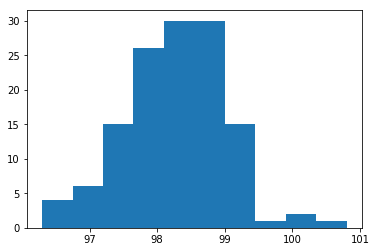

In [3]:
from matplotlib import pyplot as plt
plt.hist(df.temperature)

We can see a Gaussian-like shape to the data from hist plot.

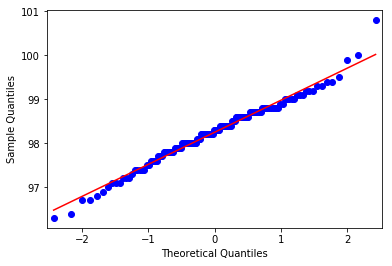

In [4]:
from statsmodels.graphics.gofplots import qqplot
qqplot(df.temperature, line='s')
plt.show()

Acoording to the QQ plot, there are a few deviations, however, overall, the data looks normally distributed.

In [9]:
# Shapiro-Wilk Test
from numpy.random import seed
from numpy.random import randn
from scipy.stats import shapiro

stat, p = shapiro(df.temperature)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('According to shapiro test, sample looks normalm distributed (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')
    
# Normal test
from scipy.stats import normaltest
statistic, p_val = normaltest(df['temperature'])

if p_val > alpha:
	print('According to chi square test, sample looks normal distributed (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=0.987, p=0.233
According to shapiro  test, sample looks normalm distributed (fail to reject H0)
According to chi square test, sample looks normal distributed (fail to reject H0)


## 2. Is the sample size large? Are the observations independent? 

In [23]:
size=len(df.temperature)
print(size)
if size < 30:
    print("The sample size is small (n < 30)")
else:
    print("The sample size is large (n > 30).")

130
The sample size is large (n > 30).


The observations are independent assuming each each measurement is taken independently from different individuals.

## 3. Is the true population mean really 98.6 degrees F? 

In [34]:
# A one-sample bootstrap hypothesis test
import numpy as np
def bootstrap_replicate_1d(data, func):
    """Generate bootstrap replicate of 1D data."""
    bs_sample = np.random.choice(data, len(data))
    return func(bs_sample) 

def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)
    return bs_replicates


In [61]:

# Make an array of adjusted temperature samples
temp = df['temperature'] - np.mean(df['temperature']) + 98.6
# Take bootstrap replicates of adjusted temperature
temp_reps = draw_bs_reps(temp, np.mean, 10000)
# Compute fraction of replicates that are less than the observed mean: p
p=np.sum(temp_reps <= np.mean(df['temperature']))/10000
print('p=', p)

p= 0.0


The null hypothesis that the mean temperature is 98.6 degrees should be rejected as suggested by the bootstrap test.

In [79]:
#Frequentist hypothesis test

import scipy.stats as st
import scipy.special as sp
size = 130  
xbar=np.mean(df['temperature'])
std=np.std(df['temperature'])
q=98.6
t = (xbar-q)/(std/np.sqrt(size))
pval = st.t.sf(np.abs(t), size-1)*2 
print('p=', pval)

p= 2.1887464624050777e-07


The null hypothesis that the mean temperature is 98.6 degrees should be rejected as suggested by the frequentist test.

In [74]:
# conduct one-sample t-test 
from scipy.stats import ttest_1samp
t_stat, p_val_t = ttest_1samp(df['temperature'], 98.6)

print('t-statistic:',t_stat)
print('p value =',p_val_t)

t-statistic: -5.4548232923645195
p value = 2.4106320415561276e-07


The null hypothesis that the mean temperature is 98.6 degrees should be rejected as suggested by the one-sample t-test. In summary, the three tests all suggest that the mean temperature is not 98.6 degree.

## 4. Draw a small sample of size 10 from the data and repeat both frequentist tests. 

In [96]:
# generate random sample
sample = np.random.choice(df['temperature'], size=10)

# conduct one-sample t-test
t_stat_1, p_val_t_1 = ttest_1samp(sample, 98.6)

print('t-statistic_1:',t_stat_1)
print('p value_1 =',p_val_t_1)

t-statistic_1: -1.2417560315769576
p value_1 = 0.24571184777277416


In [97]:
# conduct one-sample z-test
from statsmodels.stats.weightstats import ztest
z_stat, p_val_z = ztest(x1= sample, value = 98.6)

print('z-statistic:',z_stat)
print('p value =',p_val_z)

z-statistic: -1.2417560315769576
p value = 0.2143265897079739


In [98]:
# generate random sample
sample_2 = np.random.choice(df['temperature'], size=10)

# conduct second one-sample t-test
t_stat_2, p_val_t_2 = ttest_1samp(sample_2, 98.6)

print('t-statistic_2:',t_stat_2)
print('p value_2 =',p_val_t_2)

# conduct second one-sample z-test
z_stat_2, p_val_z_2 = ztest(x1= sample_2, value = 98.6)

print('z-statistic:',z_stat_2)
print('p value =',p_val_z_2)

t-statistic_2: -0.4151881231241647
p value_2 = 0.6877272907071739
z-statistic: -0.4151881231241647
p value = 0.6780041926078466


The small size t test result is not consistent. This is due to the sample size being too small.

## 5. At what temperature should we consider someone's temperature to be "abnormal"? 

In [119]:
# boostrap approach
temp_reps_2 = draw_bs_reps(df['temperature'], np.mean, 10)
conf_bs_int = np.percentile(temp_reps_2, [2.5, 97.5])
print('95% confidence interval from bootstrap approach:',conf_bs_int)

(98.22886192358892, 98.29467653794951)

In [102]:
conf_int = st.norm.interval(alpha=0.95, loc=np.mean(df['temperature']), scale=np.std(df['temperature']))
print('95% confidence interval:',conf_int)

95% confidence interval: (96.81775582674821, 99.68070571171329)


## 6. Is there a significant difference between males and females in normal temperature? 

In [126]:
male=df[df['gender']=='M']
fem=df[df['gender']=='F']

In [128]:
from scipy.stats import ttest_ind
t_stat, p_val_t = ttest_ind(male.temperature, fem.temperature)
print('p value=', p_val_t)

if p_val_t < 0.05:
    print("there is significant difference between male and female temperatures.")
else:
    print("there is no significant difference between male and female temperatures.")

p value= 0.02393188312239561
there is significant difference between male and female temperatures.


## Conclusion

### 1. The sample follows normal distribution and the temperature is different from 98.6 F.

### 2. The normal temperature range is from 96.82 to 99.68 F.

### 3. Men and women have significantly different body temperature. 